In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import ast
import calendar

In [3]:
df = pd.read_csv('data.csv', sep = '#')
df.head()

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."


In [4]:
df.dropna(inplace=True) 

In [5]:
df.shape

(321182, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321182 entries, 0 to 321199
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Position    321182 non-null  int64 
 1   Track Name  321182 non-null  object
 2   Artist      321182 non-null  object
 3   Streams     321182 non-null  int64 
 4   Date        321182 non-null  object
 5   Genre       321182 non-null  object
dtypes: int64(2), object(4)
memory usage: 17.2+ MB


In [7]:
# df.explode('Genre')
df["Genre"] = df['Genre'].apply(lambda x: ast.literal_eval(x))
df.head

<bound method NDFrame.head of         Position                               Track Name            Artist  \
0              1                                  Starboy        The Weeknd   
1              2                                   Closer  The Chainsmokers   
2              3                          Let Me Love You          DJ Snake   
3              4  Rockabye (feat. Sean Paul & Anne-Marie)      Clean Bandit   
4              5                                One Dance             Drake   
...          ...                                      ...               ...   
321195       196             Best Friend (feat. Doja Cat)          Saweetie   
321196       197                  Wonderwall - Remastered             Oasis   
321197       198                         MI FAI IMPAZZIRE            BLANCO   
321198       199                                Adore You      Harry Styles   
321199       200                               Follow You   Imagine Dragons   

        Streams      

In [31]:
df2 = df.explode('Genre')
df2 = df2.Genre.unique()
df2 = [x for x in df2 if not x.startswith('500')]
df2 = [x for x in df2 if not x.startswith('and')]
df2

['canadian pop',
 'canadian contemporary r&b',
 'pop',
 'pop dance',
 'tropical house',
 'edm',
 'electropop',
 'dance pop',
 'electronic trap',
 'pop rap',
 'uk dance',
 'uk funky',
 'post-teen pop',
 'toronto rap',
 'canadian hip hop',
 'rap',
 'hip hop',
 'pop rock',
 'mississippi hip hop',
 'melodic rap',
 'trap',
 'southern hip hop',
 'colombian pop',
 'latin pop',
 'latin',
 'uk pop',
 'talent show',
 'atl hip hop',
 'moombahton',
 'electro house',
 'dutch edm',
 'progressive house',
 'aussietronica',
 'viral pop',
 'house',
 'ohio hip hop',
 'modern rock',
 'rock',
 'australian dance',
 'australian pop',
 'boy band',
 'reggaeton',
 'virginia hip hop',
 'alternative r&b',
 'underground hip hop',
 'reggaeton colombiano',
 'trap latino',
 'girl group',
 'puerto rican pop',
 'mexican pop',
 'portland hip hop',
 'hyphy',
 'pop soul',
 'neo soul',
 'r&b',
 'urban contemporary',
 'eurodance',
 'barbadian pop',
 'latin hip hop',
 'reggaeton flow',
 'scandipop',
 'swedish electropop',
 '

In [9]:
def get_keyword_separator(s):
    if "featuring" in s.lower():
        return "featuring"
    elif "feat" in s.lower():
        return "feat"
    else:
        return "with"
    
def check_if_song_is_featured(song_name):
    keyword = get_keyword_separator(song_name)
    idx_if_exists = song_name.lower().find(keyword)
    if idx_if_exists != -1:
        feat = song_name[idx_if_exists + len(keyword) + 1:-1]
        sep = "&" if "&" in feat else ","
        return [x.strip() for x in feat.split(sep)]
    else:
        return "None"
    
def get_number_of_singers(feat):
    if isinstance(feat, list):
        return len(feat) + 1
    else:
        return 1
    
def get_song_name_only(song_name):
    sep = 'feat' if 'feat' in song_name.lower() else "with"
    idx = song_name.lower().find(sep)
    if idx != -1:
        return song_name[:idx-1].strip() # -1 to skip the ")"
    else:
        return song_name

In [10]:
df["Year"] = df["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").year)
df["Month"] = df["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").month)
df["DayOfWeek"] = df["Date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").isoweekday())
df["Featuring"] = df["Track Name"].apply(lambda x: check_if_song_is_featured(x))
df['Number Of Singers'] = df['Featuring'].apply(lambda x: get_number_of_singers(x))
df['SongName'] = df['Track Name'].apply(lambda x: get_song_name_only(x))

In [11]:
df

,Position,Track Name,Artist,Streams,Date,Genre,Year,Month,DayOfWeek,Featuring,Number Of Singers,SongName
0,1,Starboy,The Weeknd,3135625,2017-01-01,"[canadian pop, canadian contemporary r&b, pop]",2017,1,7,None,1,Starboy
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"[pop, pop dance, tropical house, edm, electrop...",2017,1,7,None,1,Closer
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"[pop, electronic trap, dance pop, edm, pop dan...",2017,1,7,None,1,Let Me Love You
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"[pop, uk dance, dance pop, uk funky, tropical ...",2017,1,7,"[Sean Paul, Anne-Marie]",3,Rockabye
4,5,One Dance,Drake,2259887,2017-01-01,"[toronto rap, canadian pop, canadian hip hop, ...",2017,1,7,None,1,One Dance
...,...,...,...,...,...,...,...,...,...,...,...,...
321195,196,Best Friend (feat. Doja Cat),Saweetie,790257,2021-07-17,"[trap queen, pop, pop rap, cali rap, dance pop]",2021,7,6,[Doja Cat],2,Best Friend
321196,197,Wonderwall - Remastered,Oasis,789099,2021-07-17,"[madchester, permanent wave, beatlesque, britp...",2021,7,6,None,1,Wonderwall - Remastered
321197,198,MI FAI IMPAZZIRE,BLANCO,788966,2021-07-17,"[italian pop, italian hip hop]",2021,7,6,None,1,MI FAI IMPAZZIRE
321198,199,Adore You,Harry Styles,788033,2021-07-17,"[pop, post-teen pop]",2021,7,6,None,1,Adore You


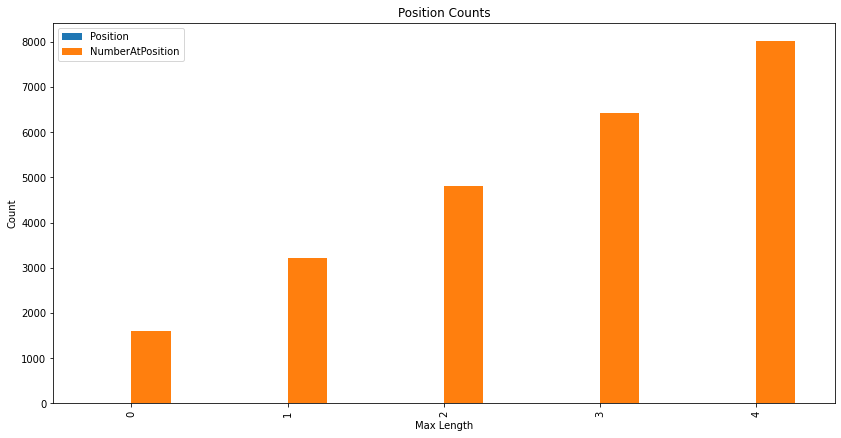

In [12]:


plot_data = df\
.query("(Position <= 5)")\
.groupby(["Position"], as_index = False)\
.agg(NumberAtPosition = ("Position", "sum"))

plot_data.plot(kind='bar', title='Position Counts', figsize=(14,7), xlabel='Max Length', ylabel='Count')
plt.show()

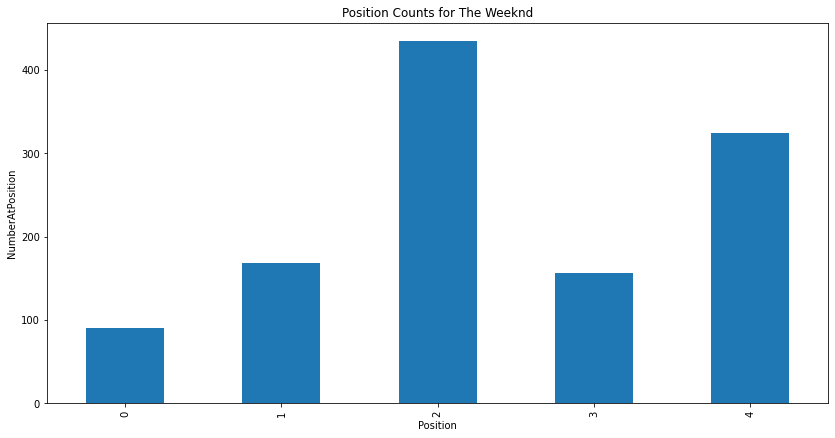

In [13]:
position = 5
artist = 'The Weeknd'

plot_data = df\
.query("(Position <= @position) & (Artist == @artist)")\
.groupby(["Position"], as_index = False)\
.agg(NumberAtPosition = ("Position", "sum"))

plot_data
plot_data.NumberAtPosition.plot(kind='bar', title='Position Counts for The Weeknd', figsize=(14,7), xlabel='Position', ylabel='NumberAtPosition')
plt.show()

In [14]:
position = 5
artist = 'The Weeknd'

plot_data = df\
.query("(Position <= @position) & (Year == 2017) & (Month == 2)")\
.groupby(["Track Name"], as_index = False)\
.agg(NumberAtPosition = ("Position", "sum"))

plot_data
#plot_data.NumberAtPosition.plot(kind='bar', title='Position Counts for The Weeknd', figsize=(14,7), xlabel='Position', ylabel='NumberAtPosition')
#plt.show()

,Track Name,NumberAtPosition
0,Castle on the Hill,45
1,Despacito (Featuring Daddy Yankee),93
2,I Don’t Wanna Live Forever (Fifty Shades Darke...,76
3,It Ain't Me (with Selena Gomez),36
4,Paris,83
5,Rockabye (feat. Sean Paul & Anne-Marie),20
6,Scared to Be Lonely,15
7,Shape of You,27
8,Something Just Like This,10


In [15]:
#Table 2 complete
position = 5
artist = 'The Weeknd'

plot_data = df\
.query("(Artist == @artist)")\
.groupby(["Track Name"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))

#plot_data
plot_data.sort_values('TotalStreams', ascending=False).drop_duplicates('Track Name').head(5)

,Track Name,TotalStreams
2,Blinding Lights,2198561599
35,Starboy,592158471
14,I Feel It Coming,494326595
28,Save Your Tears,490808975
16,In Your Eyes,456255976


In [16]:
#Table 1
plot_data = df\
.query("(Year == 2017) & (Month == 2)")\
.groupby(["Track Name"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))

plot_data.sort_values('TotalStreams', ascending=False)
#plot_data.NumberAtPosition.plot(kind='bar', title='Position Counts for The Weeknd', figsize=(14,7), xlabel='Position', ylabel='NumberAtPosition')
#plt.show()

,Track Name,TotalStreams
218,Shape of You,200107746
95,I Don’t Wanna Live Forever (Fifty Shades Darke...,109822457
183,Paris,104451639
61,Despacito (Featuring Daddy Yankee),99489675
39,Castle on the Hill,79059493
...,...,...
154,"Mia & Sebastian’s Theme - From ""La La Land"" So...",408135
4,Ain't My Fault,407539
53,Come and See Me (feat. Drake),401922
198,Rolex,389487


In [17]:
#Table 3

artist = 'The Weeknd'

top5Artists = df\
.groupby(["Artist"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))\
.sort_values('TotalStreams', ascending=False).head(5)

top5Artists = top5Artists.Artist


top5Artists

TotalStreamsTop5 = df\
.query("(Artist.isin(@top5Artists))")\
.groupby(["Year","Artist"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))



#plot_data = df\
#.query("(Artist == @artist)")\
#.groupby(["Year"], as_index = False)\
#.agg(TotalStreams = ("Streams", "sum"))

#plot_data.sort_values('TotalStreams', ascending=False)

In [18]:
# Plotly
#!pip install plotly
import plotly.io as pio
import plotly.graph_objects as go
from plotly.figure_factory import create_distplot
import plotly.express as px
pio.templates["draft"] = go.layout.Template(
    layout_annotations=[
        dict(
            textangle=-30,
            opacity=0.1,
            font=dict(color="black", size=100),
            xref="paper",
            yref="paper",
            x=0.5,
            y=0.5,
            showarrow=False,
        )
    ]
)
pio.templates.default = "draft"


In [19]:
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

<module 'plotly.version' from '/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/plotly/version.py'>


In [20]:
#!pip install jupyter-dash

Ariana Grande
    Year         Artist  TotalStreams
0   2017  Ariana Grande     415794788
4   2018  Ariana Grande    1735820355
9   2019  Ariana Grande    3376214133
14  2020  Ariana Grande    1803549568
19  2021  Ariana Grande     878528557
Drake
    Year Artist  TotalStreams
1   2017  Drake    2230907695
6   2018  Drake    4049291866
11  2019  Drake     962523332
16  2020  Drake    1412837171
21  2021  Drake     503148066
Ed Sheeran
    Year      Artist  TotalStreams
2   2017  Ed Sheeran    4526988042
7   2018  Ed Sheeran    1843401689
12  2019  Ed Sheeran    3118912731
17  2020  Ed Sheeran    1394398726
22  2021  Ed Sheeran     566983091
Post Malone
    Year       Artist  TotalStreams
3   2017  Post Malone    1743875146
8   2018  Post Malone    4474074823
13  2019  Post Malone    4989227763
18  2020  Post Malone    1914609421
23  2021  Post Malone     391674264
Billie Eilish
    Year         Artist  TotalStreams
5   2018  Billie Eilish     712262774
10  2019  Billie Eilish    449765

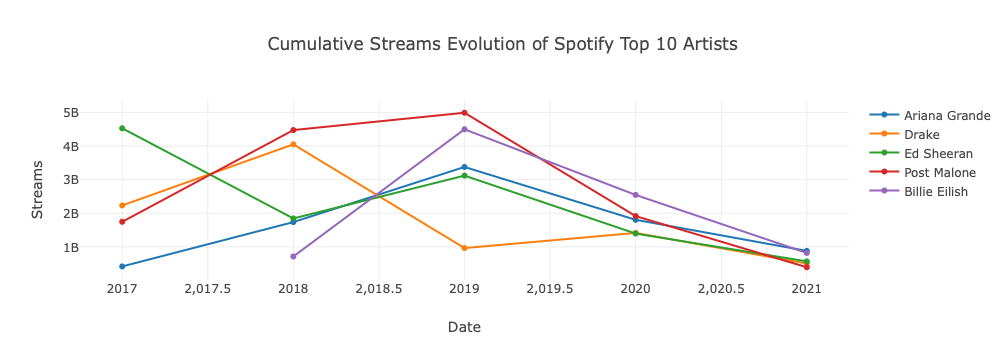

In [21]:
TotalStreamsTop5
%matplotlib inline

fig = go.Figure()

for artist in TotalStreamsTop5.Artist.unique():
    print(artist)
    artist_data = TotalStreamsTop5.query("(Artist == @artist)")
    print(artist_data)
    fig.add_trace(go.Scatter(x=artist_data['Year'], y=artist_data['TotalStreams'], name=artist))

fig.update_layout(xaxis_title="Date", yaxis_title="Streams", title="Cumulative Streams Evolution of Spotify Top 10 Artists")

fig.show()

In [22]:
top5Artists = df\
.groupby(["Artist"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))\
.sort_values('TotalStreams', ascending=False).head(5)

top5Artists = top5Artists.Artist




TotalStreamsTop5 = df\
.query("(Artist.isin(@top5Artists))")\
.groupby(["Date","Artist"], as_index = False)\
.agg(TotalStreams = ("Streams", "sum"))

TotalStreamsTop5

,Date,Artist,TotalStreams
0,2017-01-01,Ariana Grande,2290178
1,2017-01-01,Drake,7384985
2,2017-01-01,Ed Sheeran,908618
3,2017-01-01,Post Malone,332756
4,2017-01-02,Ariana Grande,2275404
...,...,...,...
7359,2021-07-17,Ariana Grande,1857183
7360,2021-07-17,Billie Eilish,3670701
7361,2021-07-17,Drake,1982538
7362,2021-07-17,Ed Sheeran,7803622


Ariana Grande
            Date         Artist  TotalStreams
0     2017-01-01  Ariana Grande       2290178
4     2017-01-02  Ariana Grande       2275404
8     2017-01-03  Ariana Grande       2429384
12    2017-01-04  Ariana Grande       2483126
16    2017-01-05  Ariana Grande       2464239
...          ...            ...           ...
7339  2021-07-13  Ariana Grande       2526404
7344  2021-07-14  Ariana Grande       2555437
7349  2021-07-15  Ariana Grande       2597060
7354  2021-07-16  Ariana Grande       1927646
7359  2021-07-17  Ariana Grande       1857183

[1430 rows x 3 columns]
Drake
            Date Artist  TotalStreams
1     2017-01-01  Drake       7384985
5     2017-01-02  Drake       7050465
9     2017-01-03  Drake       7424613
13    2017-01-04  Drake       7423437
17    2017-01-05  Drake       7485804
...          ...    ...           ...
7341  2021-07-13  Drake       2024946
7346  2021-07-14  Drake       2035545
7351  2021-07-15  Drake       2048825
7356  2021-07-16  Drake

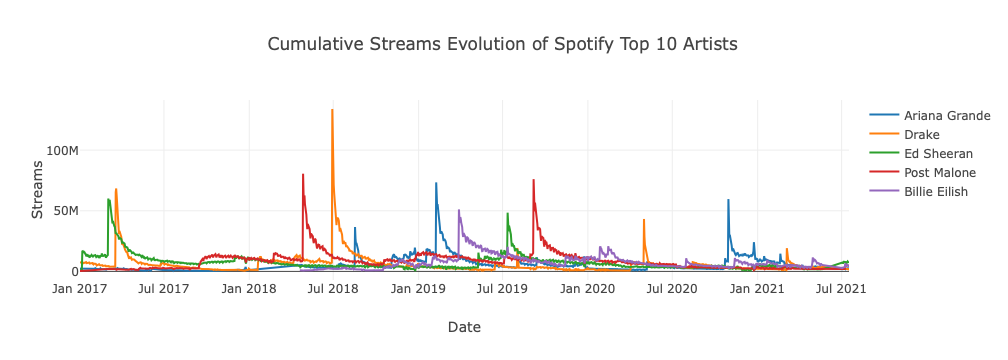

In [23]:
fig = go.Figure()

for artist in TotalStreamsTop5.Artist.unique():
    print(artist)
    artist_data = TotalStreamsTop5.query("(Artist == @artist)")
    print(artist_data)
    fig.add_trace(go.Scatter(x=artist_data['Date'], y=artist_data['TotalStreams'], name=artist))

fig.update_layout(xaxis_title="Date", yaxis_title="Streams", title="Cumulative Streams Evolution of Spotify Top 10 Artists")

fig.show()